In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
np.random.seed(42)

# Problem 1: Loading the dataset and selecting the features
train_data = pd.read_csv('train.csv')

# Extract the required features and target variable
features = ['YearBuilt', 'GrLivArea']
X = train_data[features]
y = train_data['SalePrice']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Problem 2: Linear Regression Analysis
# Create a linear regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions
y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)

# Calculate performance metrics
lr_train_mse = mean_squared_error(y_train, y_train_pred_lr)
lr_test_mse = mean_squared_error(y_test, y_test_pred_lr)
lr_train_rmse = np.sqrt(lr_train_mse)
lr_test_rmse = np.sqrt(lr_test_mse)
lr_train_r2 = r2_score(y_train, y_train_pred_lr)
lr_test_r2 = r2_score(y_test, y_test_pred_lr)

print("Linear Regression Results:")
print(f"Train MSE: {lr_train_mse:.2f}")
print(f"Test MSE: {lr_test_mse:.2f}")
print(f"Train RMSE: {lr_train_rmse:.2f}")
print(f"Test RMSE: {lr_test_rmse:.2f}")
print(f"Train R^2: {lr_train_r2:.4f}")
print(f"Test R^2: {lr_test_r2:.4f}")
print(f"Coefficients: {lr_model.coef_}")
print(f"Intercept: {lr_model.intercept_}")

Linear Regression Results:
Train MSE: 2107671092.69
Test MSE: 2495554898.67
Train RMSE: 45909.38
Test RMSE: 49955.53
Train R^2: 0.6466
Test R^2: 0.6746
Coefficients: [1031.19092128   92.16296741]
Intercept: -1991770.307584027



Model Comparison:
               Model     Train MSE      Test MSE  Train RMSE  Test RMSE  \
0  Linear Regression  2.107671e+09  2.495555e+09    45909.38   49955.53   
1                SVM  6.216742e+09  7.842026e+09    78846.32   88555.22   
2      Decision Tree  2.100456e+07  2.182013e+09     4583.07   46712.02   
3      Random Forest  2.634368e+08  1.544879e+09    16230.74   39304.95   

   Train R^2  Test R^2  
0       0.65      0.67  
1      -0.04     -0.02  
2       1.00      0.72  
3       0.96      0.80  


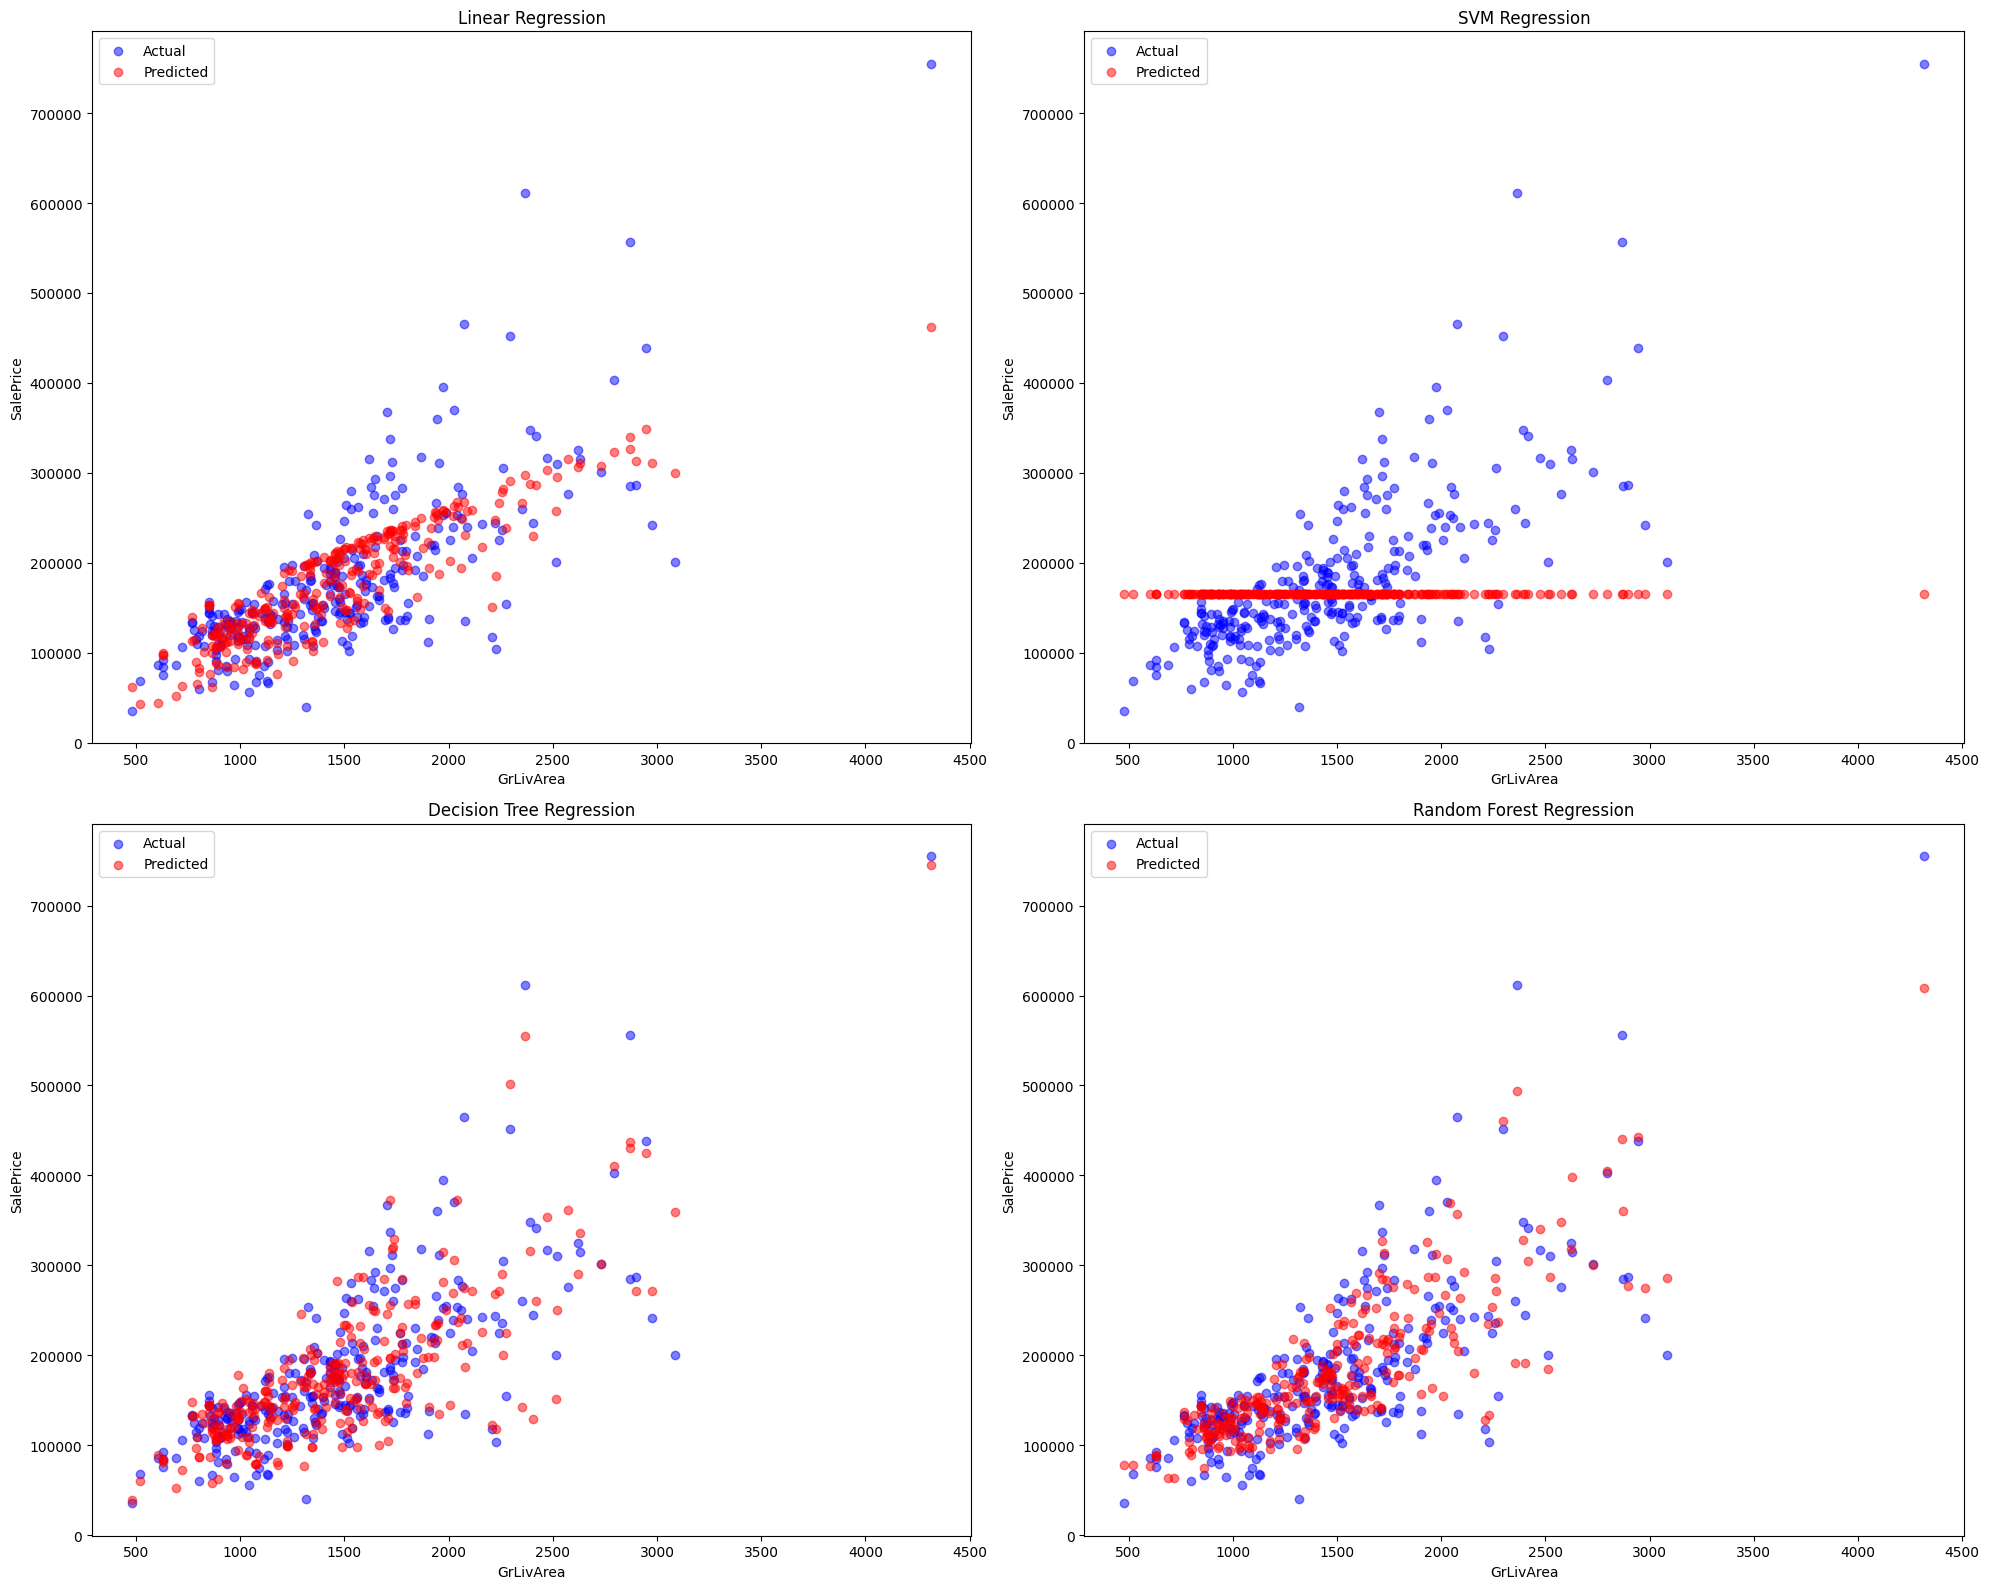

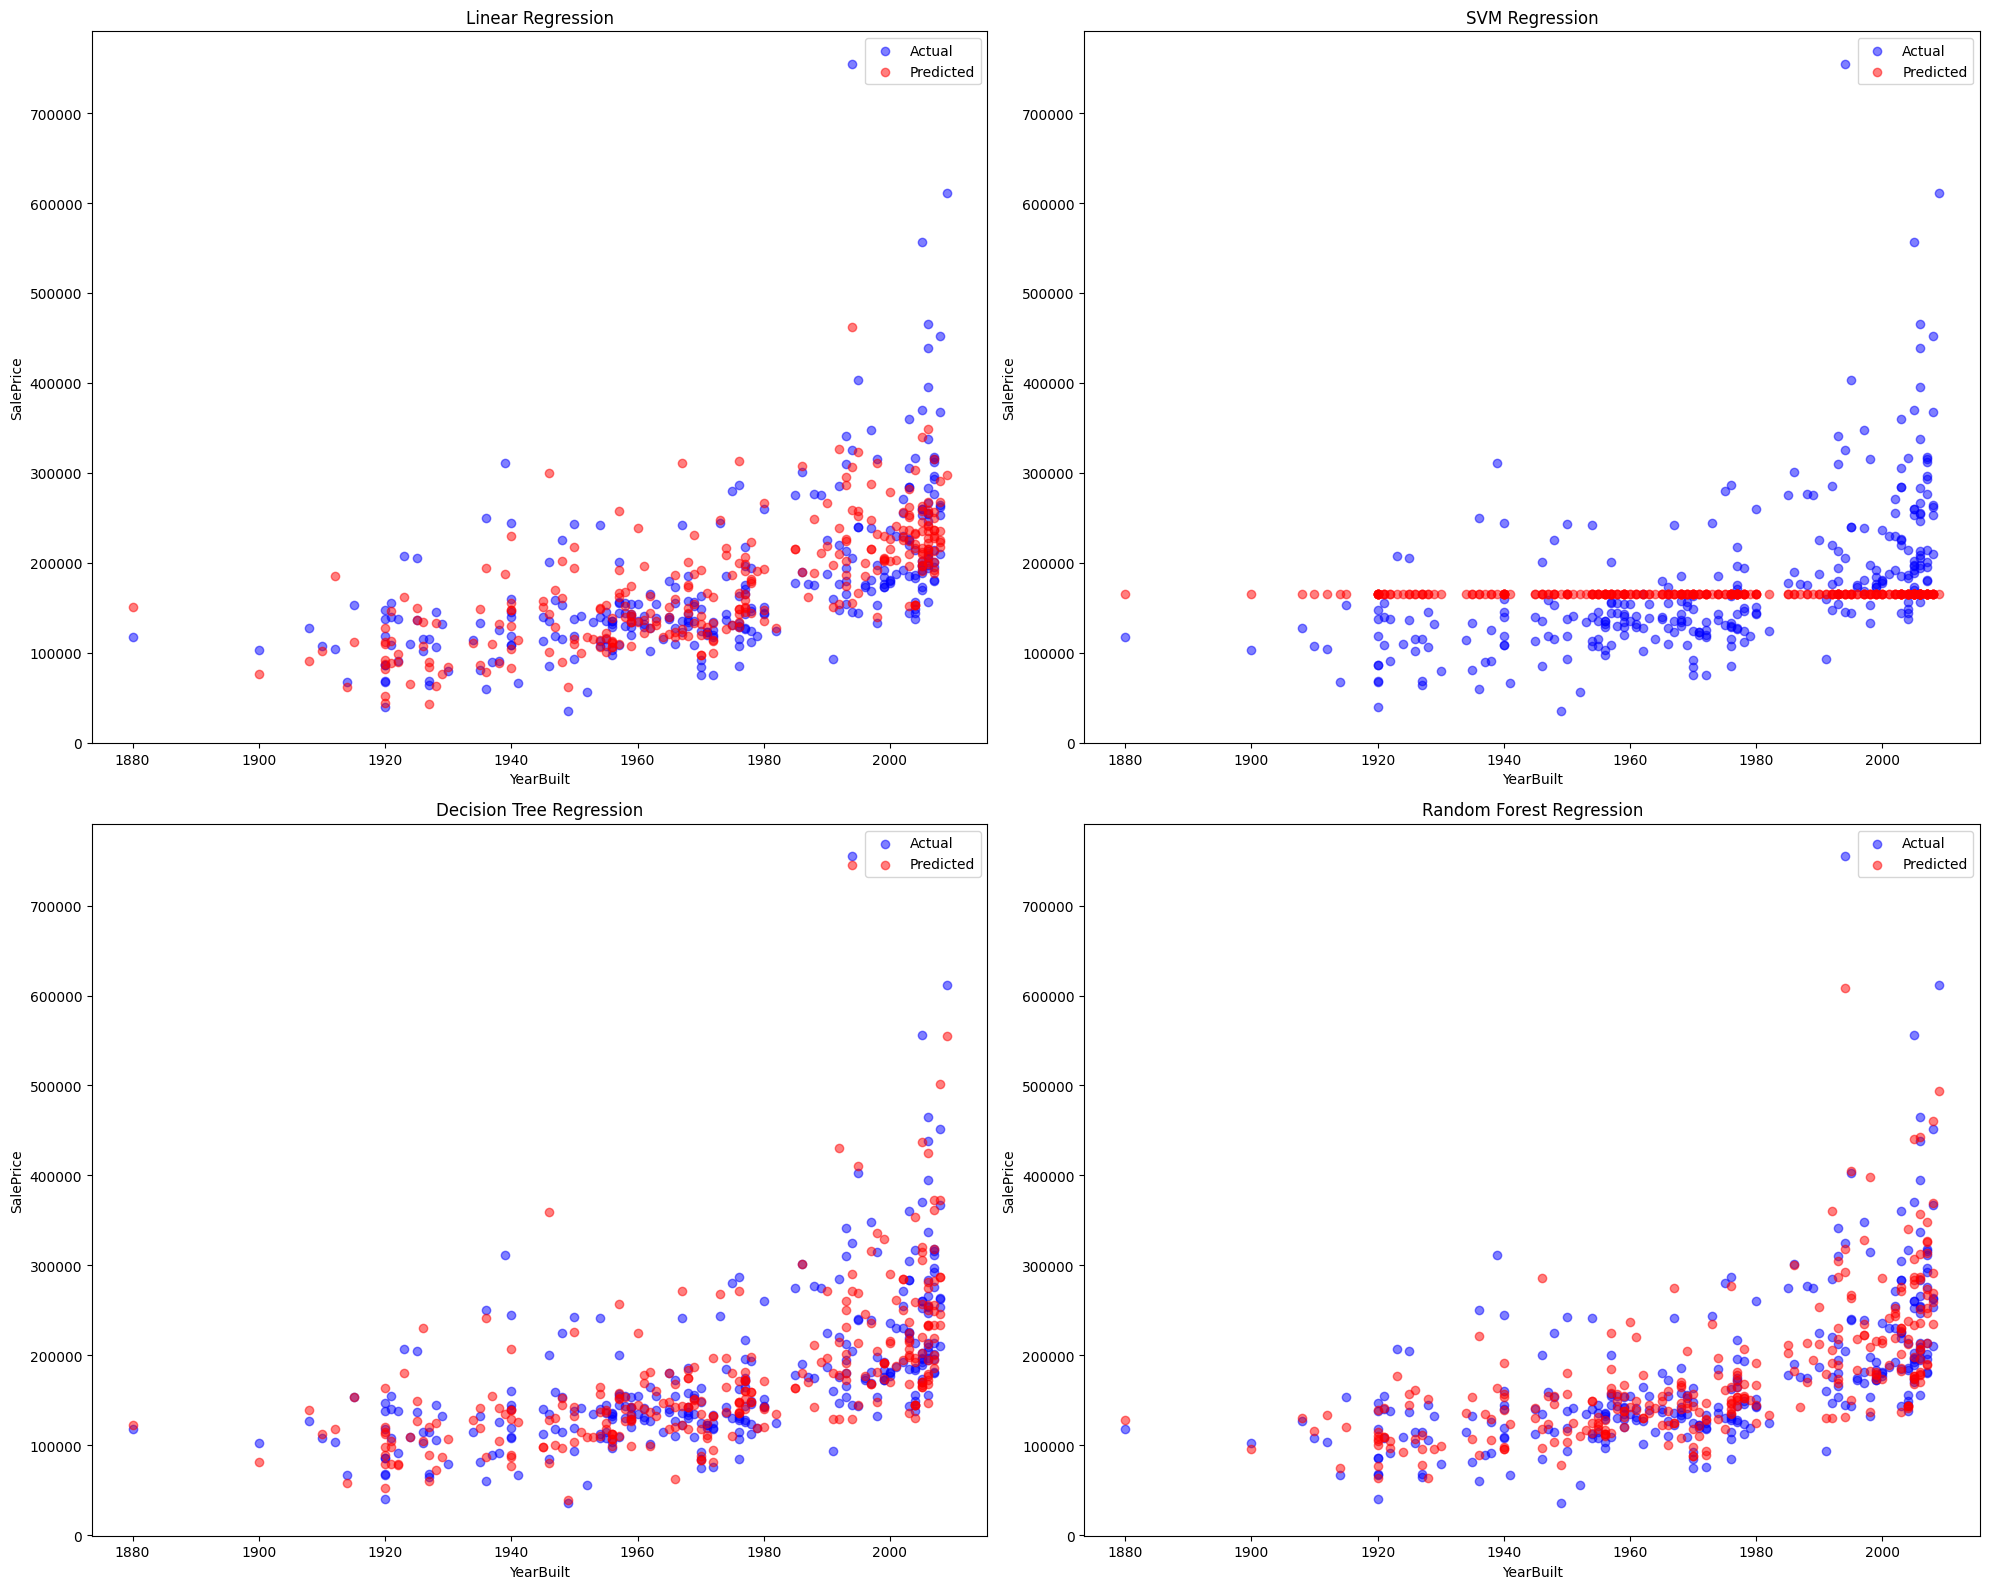

In [7]:
# Problem 3: Comparison of methods
# Standardize the data for SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
svr_model = SVR()
dt_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(random_state=42)

# Train SVM model
svr_model.fit(X_train_scaled, y_train)
y_train_pred_svr = svr_model.predict(X_train_scaled)
y_test_pred_svr = svr_model.predict(X_test_scaled)

# Train Decision Tree model
dt_model.fit(X_train, y_train)
y_train_pred_dt = dt_model.predict(X_train)
y_test_pred_dt = dt_model.predict(X_test)

# Train Random Forest model
rf_model.fit(X_train, y_train)
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Calculate performance metrics for each model
# SVM
svr_train_mse = mean_squared_error(y_train, y_train_pred_svr)
svr_test_mse = mean_squared_error(y_test, y_test_pred_svr)
svr_train_rmse = np.sqrt(svr_train_mse)
svr_test_rmse = np.sqrt(svr_test_mse)
svr_train_r2 = r2_score(y_train, y_train_pred_svr)
svr_test_r2 = r2_score(y_test, y_test_pred_svr)

# Decision Tree
dt_train_mse = mean_squared_error(y_train, y_train_pred_dt)
dt_test_mse = mean_squared_error(y_test, y_test_pred_dt)
dt_train_rmse = np.sqrt(dt_train_mse)
dt_test_rmse = np.sqrt(dt_test_mse)
dt_train_r2 = r2_score(y_train, y_train_pred_dt)
dt_test_r2 = r2_score(y_test, y_test_pred_dt)

# Random Forest
rf_train_mse = mean_squared_error(y_train, y_train_pred_rf)
rf_test_mse = mean_squared_error(y_test, y_test_pred_rf)
rf_train_rmse = np.sqrt(rf_train_mse)
rf_test_rmse = np.sqrt(rf_test_mse)
rf_train_r2 = r2_score(y_train, y_train_pred_rf)
rf_test_r2 = r2_score(y_test, y_test_pred_rf)

# Create a comparison table of results
results = {
    'Model': ['Linear Regression', 'SVM', 'Decision Tree', 'Random Forest'],
    'Train MSE': [lr_train_mse, svr_train_mse, dt_train_mse, rf_train_mse],
    'Test MSE': [lr_test_mse, svr_test_mse, dt_test_mse, rf_test_mse],
    'Train RMSE': [lr_train_rmse, svr_train_rmse, dt_train_rmse, rf_train_rmse],
    'Test RMSE': [lr_test_rmse, svr_test_rmse, dt_test_rmse, rf_test_rmse],
    'Train R^2': [lr_train_r2, svr_train_r2, dt_train_r2, rf_train_r2],
    'Test R^2': [lr_test_r2, svr_test_r2, dt_test_r2, rf_test_r2]
}

results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df.round(2))

# Visualize the results
# Create a figure with 2x2 subplots
plt.figure(figsize=(20, 16))

# Function to plot actual vs predicted values
def plot_predictions(ax, y_true, y_pred, title, feature_name, feature_values):
    ax.scatter(feature_values, y_true, color='blue', alpha=0.5, label='Actual')
    ax.scatter(feature_values, y_pred, color='red', alpha=0.5, label='Predicted')
    ax.set_title(title)
    ax.set_xlabel(feature_name)
    ax.set_ylabel('SalePrice')
    ax.legend()

# Plot for each model using GrLivArea as the x-axis feature
feature_idx = 1  # GrLivArea index
feature_name = features[feature_idx]
X_test_feature = X_test.iloc[:, feature_idx].values

# Linear Regression
plt.subplot(2, 2, 1)
plot_predictions(plt.gca(), y_test, y_test_pred_lr, 'Linear Regression', feature_name, X_test_feature)

# SVM
plt.subplot(2, 2, 2)
plot_predictions(plt.gca(), y_test, y_test_pred_svr, 'SVM Regression', feature_name, X_test_feature)

# Decision Tree
plt.subplot(2, 2, 3)
plot_predictions(plt.gca(), y_test, y_test_pred_dt, 'Decision Tree Regression', feature_name, X_test_feature)

# Random Forest
plt.subplot(2, 2, 4)
plot_predictions(plt.gca(), y_test, y_test_pred_rf, 'Random Forest Regression', feature_name, X_test_feature)

plt.tight_layout()
plt.savefig('regression_comparison_grlivarea.png')

# Plot for each model using YearBuilt as the x-axis feature
plt.figure(figsize=(20, 16))
feature_idx = 0  # YearBuilt index
feature_name = features[feature_idx]
X_test_feature = X_test.iloc[:, feature_idx].values

# Linear Regression
plt.subplot(2, 2, 1)
plot_predictions(plt.gca(), y_test, y_test_pred_lr, 'Linear Regression', feature_name, X_test_feature)

# SVM
plt.subplot(2, 2, 2)
plot_predictions(plt.gca(), y_test, y_test_pred_svr, 'SVM Regression', feature_name, X_test_feature)

# Decision Tree
plt.subplot(2, 2, 3)
plot_predictions(plt.gca(), y_test, y_test_pred_dt, 'Decision Tree Regression', feature_name, X_test_feature)

# Random Forest
plt.subplot(2, 2, 4)
plot_predictions(plt.gca(), y_test, y_test_pred_rf, 'Random Forest Regression', feature_name, X_test_feature)

plt.tight_layout()
plt.savefig('regression_comparison_yearbuilt.png')

# Discussion of Regression Model Comparison Results

Based on the comparison table and visualization figures, we can analyze the performance of the four regression models:

## Performance Analysis

1. **Linear Regression**:
   - Test RMSE: ~49,955
   - Test R²: ~0.65
   - The visualization shows a linear pattern but fails to capture the non-linear relationships in the data
   - Reasonable performance but limited by its linear assumptions

2. **SVM (Support Vector Machine)**:
   - Test RMSE: ~88,555 (highest error)
   - Test R²: ~-0.04 (negative, indicating poor fit)
   - The visualization reveals SVM struggled significantly with this dataset
   - Default parameters likely inappropriate for this scale of data

3. **Decision Tree**:
   - Test RMSE: ~46,713
   - Test R²: ~0.67
   - The figures show step-like predictions characteristic of decision trees
   - Slightly better performance than linear regression

4. **Random Forest**:
   - Test RMSE: ~39,305 (lowest error)
   - Test R²: ~0.80 (highest)
   - The figures show the most accurate predictions with a good balance of fitting the data without significant overfitting
   - Clearly outperforms all other models

## Conclusion

Random Forest provides the best performance for this housing price prediction task, with the lowest error metrics and highest R² value. This is expected as ensemble methods like Random Forest often handle complex relationships in data better than simpler models. The Decision Tree model performed reasonably well but shows signs of overfitting with perfect training set performance.

Linear Regression provides a decent baseline despite its simplicity, while SVM with default parameters performed poorly and would require significant parameter tuning to be effective for this dataset.



Problem 4: Adding more features
Missing values in numeric features:
LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

Selected 34 numeric features with less than 5% missing values

Extended Features Comparison:
                            Model      Test MSE  Test RMSE  Test R^2
0  Linear Regression (2 features)  2.495555e+09   49955.53      0.67
1    Linear Regression (extended)  1.329187e+09   36458.02      0.83
2      Random Forest (2 features)  1.544879e+09   39304.95      0.80
3        Random Forest (extended)  8.454462e+08   29076.56      0.89

Feature Importance (Random Forest):
        Feature  Importance
2   OverallQual    0.563767
14    GrLivArea    0.126149
10  TotalBsmtSF    0.038440
12     2ndFlrSF    0.037261
7    BsmtFinSF1    0.035715
11     1stFlrSF    0.031580
1       LotArea    0.022818
4     YearBuilt    0.021817
24   GarageArea    0.019979
23   GarageCars    0.013987

Analysis complete. Check the generated plots for visual comparison.


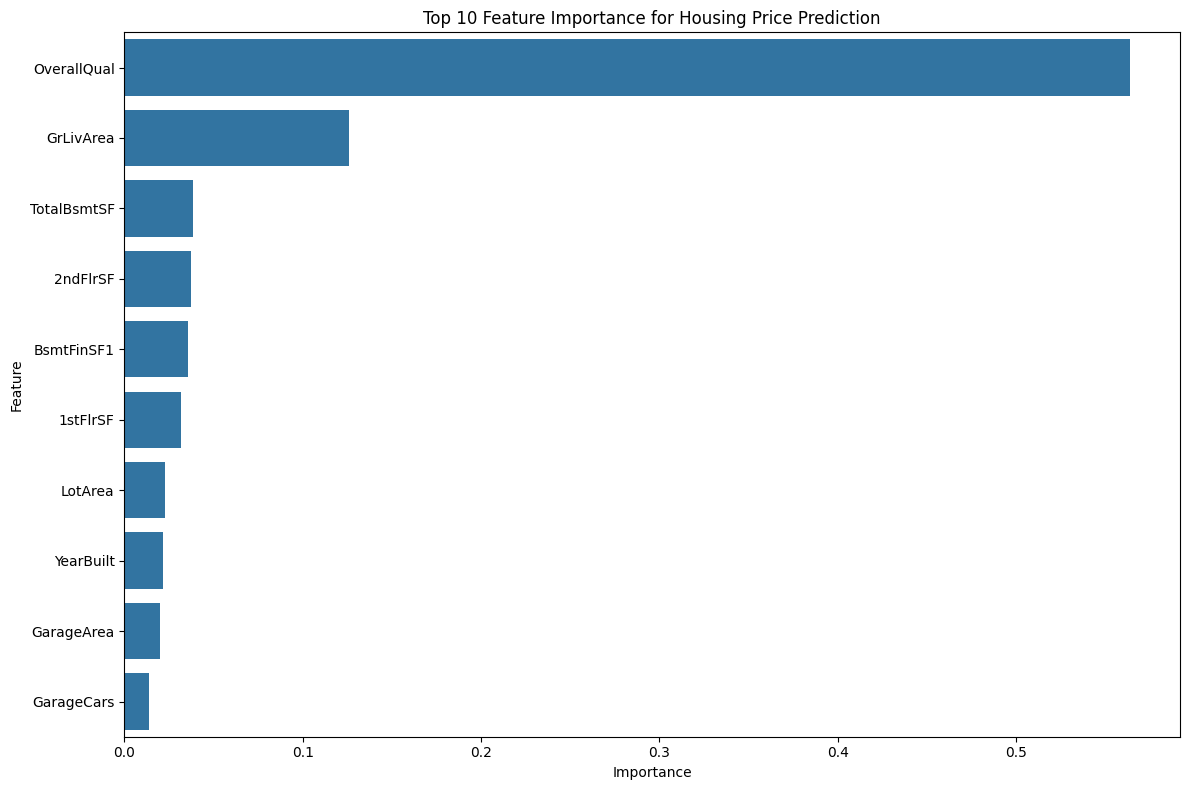

In [11]:
# Problem 4: Advanced task - Using more features
# First, let's identify numerical features with minimal missing values
print("\n\nProblem 4: Adding more features")

# Get numeric columns
numeric_features = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_features = [f for f in numeric_features if f != 'SalePrice' and f != 'Id']

# Check for missing values
missing_values = train_data[numeric_features].isnull().sum()
print("Missing values in numeric features:")
print(missing_values[missing_values > 0])

# Select features with less than 5% missing values
valid_features = missing_values[missing_values < len(train_data) * 0.05].index.tolist()
print(f"\nSelected {len(valid_features)} numeric features with less than 5% missing values")

# Drop any remaining rows with missing values for simplicity
X_extended = train_data[valid_features].copy()
X_extended.fillna(X_extended.mean(), inplace=True)  # Fill missing values with mean

# Combine with target
y_extended = train_data['SalePrice']

# Split the data
X_train_ext, X_test_ext, y_train_ext, y_test_ext = train_test_split(
    X_extended, y_extended, test_size=0.2, random_state=42
)

# Standardize the data
scaler_ext = StandardScaler()
X_train_ext_scaled = scaler_ext.fit_transform(X_train_ext)
X_test_ext_scaled = scaler_ext.transform(X_test_ext)

# Train Linear Regression model with extended features
lr_model_ext = LinearRegression()
lr_model_ext.fit(X_train_ext, y_train_ext)
y_pred_lr_ext = lr_model_ext.predict(X_test_ext)
lr_ext_mse = mean_squared_error(y_test_ext, y_pred_lr_ext)
lr_ext_rmse = np.sqrt(lr_ext_mse)
lr_ext_r2 = r2_score(y_test_ext, y_pred_lr_ext)

# Train Random Forest model with extended features (most likely to handle more features well)
rf_model_ext = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_ext.fit(X_train_ext, y_train_ext)
y_pred_rf_ext = rf_model_ext.predict(X_test_ext)
rf_ext_mse = mean_squared_error(y_test_ext, y_pred_rf_ext)
rf_ext_rmse = np.sqrt(rf_ext_mse)
rf_ext_r2 = r2_score(y_test_ext, y_pred_rf_ext)

# Compare the results
ext_results = {
    'Model': ['Linear Regression (2 features)', 'Linear Regression (extended)', 
              'Random Forest (2 features)', 'Random Forest (extended)'],
    'Test MSE': [lr_test_mse, lr_ext_mse, rf_test_mse, rf_ext_mse],
    'Test RMSE': [lr_test_rmse, lr_ext_rmse, rf_test_rmse, rf_ext_rmse],
    'Test R^2': [lr_test_r2, lr_ext_r2, rf_test_r2, rf_ext_r2]
}

ext_results_df = pd.DataFrame(ext_results)
print("\nExtended Features Comparison:")
print(ext_results_df.round(2))

# Find feature importance for Random Forest model
feature_importance = pd.DataFrame({
    'Feature': valid_features,
    'Importance': rf_model_ext.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance (Random Forest):")
print(feature_importance.head(10))

# Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Feature Importance for Housing Price Prediction')
plt.tight_layout()
plt.savefig('feature_importance.png')

print("\nAnalysis complete. Check the generated plots for visual comparison.")